# 0. Install and Import Dependencies

In [1]:
!pip install stable-baselines3 gym-anytrading gymnasium sb3-contrib

In [2]:
# Gym Environment Imports
import gymnasium as gym
import gym_anytrading

# Stable-Baselines3 Imports
from stable_baselines3 import A2C
from sb3_contrib import RecurrentPPO
from stable_baselines3.common.vec_env import DummyVecEnv

# Other Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load MarketWatch Data

NVIDIA Corp. Historical Quotes from 10/30/2023 to 10/28/2024

In [3]:
df = pd.read_csv('data/NVDA.csv')

In [4]:
df = df.iloc[::-1]
df.head()

,Date,Open,High,Low,Close,Volume
251,10/31/2023,40.45,40.88,39.23,40.78,"517,968,705"
250,11/01/2023,40.88,42.38,40.87,42.33,"437,592,886"
249,11/02/2023,43.33,43.88,42.89,43.51,"409,171,906"
248,11/03/2023,44.02,45.31,43.72,45.01,"424,609,606"
247,11/06/2023,45.28,45.94,44.90,45.75,"400,733,396"


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [6]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-10-31,40.45,40.88,39.23,40.78,"517,968,705"
2023-11-01,40.88,42.38,40.87,42.33,"437,592,886"
2023-11-02,43.33,43.88,42.89,43.51,"409,171,906"
2023-11-03,44.02,45.31,43.72,45.01,"424,609,606"
2023-11-06,45.28,45.94,44.90,45.75,"400,733,396"


In [7]:
gym.envs.registry.keys()

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0', 'forex-v0', 'stocks-v0'])

In [8]:
df.shape

(252, 5)

In [9]:
env = gym.make('stocks-v0', df=df, frame_bound=(222, 252), window_size=5)

In [10]:
env.signal_features

/Users/danielgiaoo/Developer/GitHub/python-trading-bot-reinforcement-learning/.venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[ 1.1914e+02,  0.0000e+00],
       [ 1.1910e+02, -4.0000e-02],
       [ 1.1678e+02, -2.3200e+00],
       [ 1.1559e+02, -1.1900e+00],
       [ 1.1337e+02, -2.2200e+00],
       [ 1.1787e+02,  4.5000e+00],
       [ 1.1600e+02, -1.8700e+00],
       [ 1.1626e+02,  2.6000e-01],
       [ 1.2087e+02,  4.6100e+00],
       [ 1.2351e+02,  2.6400e+00],
       [ 1.2404e+02,  5.3000e-01],
       [ 1.2140e+02, -2.6400e+00],
       [ 1.2144e+02,  4.0000e-02],
       [ 1.1700e+02, -4.4400e+00],
       [ 1.1885e+02,  1.8500e+00],
       [ 1.2285e+02,  4.0000e+00],
       [ 1.2492e+02,  2.0700e+00],
       [ 1.2772e+02,  2.8000e+00],
       [ 1.3289e+02,  5.1700e+00],
       [ 1.3265e+02, -2.4000e-01],
       [ 1.3481e+02,  2.1600e+00],
       [ 1.3480e+02, -1.0000e-02],
       [ 1.3807e+02,  3.2700e+00],
       [ 1.3160e+02, -6.4700e+00],
       [ 1.3572e+02,  4.1200e+00],
       [ 1.3693e+02,  1.2100e+00],
       [ 1.3800e+02,  1.0700e+00],
       [ 1.4371e+02,  5.7100e+00],
       [ 1.4359e+02,

# 2. Test Environment

info {'total_reward': np.float32(15.969994), 'total_profit': np.float32(1.0358081), 'position': <Positions.Short: 0>}


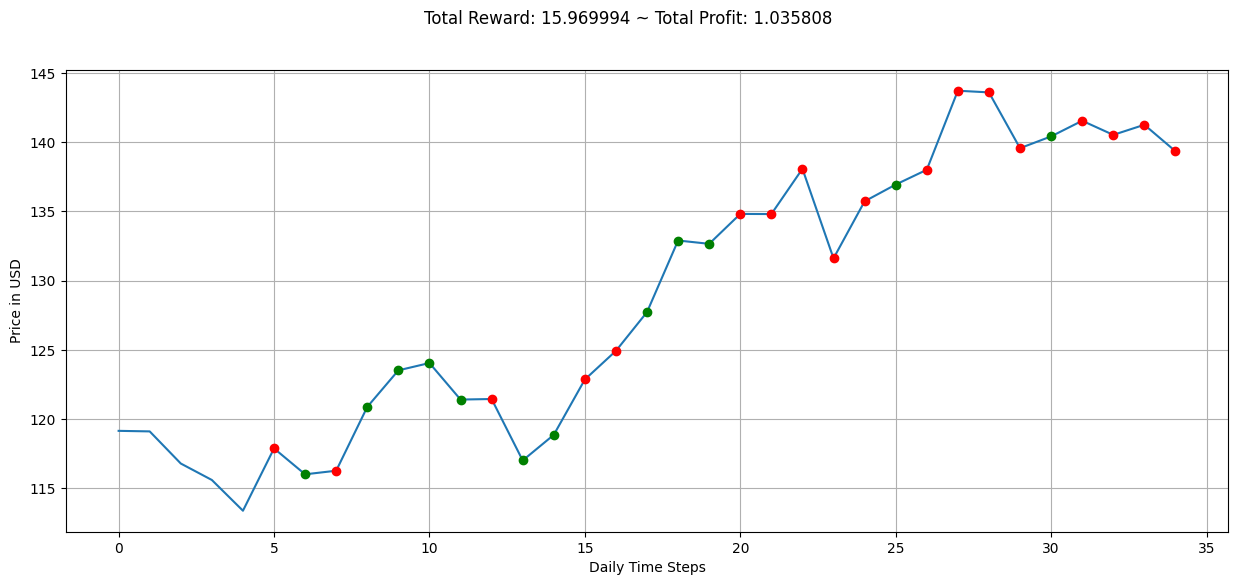

In [15]:
observation = env.reset(seed=2024)

while True:
    # Take a random action
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all()
plt.xlabel('Daily Time Steps')
plt.ylabel('Price in USD')
plt.grid(True)
plt.show()

Notice :  Total Profit of 1.0358081 indicates that by taking random actions (seed=2024), we are in the money with a non negligible profit, which is not bad at all. Let's try to do better however with a RL Agent.

# 3. Train RL Agent

In [81]:
TRAIN_FRAME_BOUND = (5, 221)
TEST_FRAME_BOUND = (222, 252)

In [82]:
train_env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=TRAIN_FRAME_BOUND, window_size=5)
test_env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=TEST_FRAME_BOUND, window_size=5)

train_env = DummyVecEnv([train_env_maker])
test_env = DummyVecEnv([test_env_maker])

In [83]:
# model = A2C(
#     policy="MlpPolicy",
#     env=train_env,
#     verbose=1,
# )
model = RecurrentPPO(
    policy="MlpLstmPolicy",
    env=train_env,
    verbose=1,
)

model.learn(total_timesteps=100000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 2492 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 128  |
-----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 316           |
|    iterations           | 2             |
|    time_elapsed         | 0             |
|    total_timesteps      | 256           |
| train/                  |               |
|    approx_kl            | 0.0041476027  |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.692        |
|    explained_variance   | -0.0019991398 |
|    learning_rate        | 0.0003        |
|    loss                 | 4.97          |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.00709      |
|    value_loss           | 10.7          |
-------------------------

In [84]:
model.save("recurrent_ppo_stocks")
model = RecurrentPPO.load("recurrent_ppo_stocks", env=train_env)
# model.save("A2C_stocks")
# model = A2C.load("A2C_stocks", env=train_env)

# 4. Evaluation

In [85]:
observation = test_env.reset()
lstm_states = None
while True:
    action, lstm_states = model.predict(observation, state=lstm_states, deterministic=True)
    observation, rewards, done, info = test_env.step(action)

    if done:
        print("info", info)
        break

## Plotting test_env does not work, since test_env is being reset when done
# plt.figure(figsize=(15,6))
# plt.cla()
# test_env.envs[0].unwrapped.render_all()
# plt.xlabel('Daily Time Steps')
# plt.ylabel('Price in USD')
# plt.grid(True)
# plt.show()


info [{'total_reward': 0.0, 'total_profit': np.float32(1.1832489), 'position': <Positions.Long: 1>, 'TimeLimit.truncated': True, 'terminal_observation': array([[140.41,   0.85],
       [141.54,   1.13],
       [140.52,  -1.02],
       [141.25,   0.73],
       [139.34,  -1.91]], dtype=float32)}]


The Total Profit is now 1.1832489 with the trained RecurrentPPO vs. 1.0358081 with random actions, which is significantly better.

Notice : Plotting doesn't work :(